# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

In [2]:
from Tools.tools import rec
from Tools.tools import collection

### Collection des données

In [75]:
for i in range(1, 20+1):
    collection()

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer le chiffre : 0
Prononcer le chiffre : 1
Prononcer le chiffre : 2
Prononcer le chiffre : 3
Prononcer le chiffre : 4
Prononcer le chiffre : 5
Prononcer le chiffre : 6
Prononcer le chiffre : 7
Prononcer le chiffre : 8
Prononcer le chiffre : 9
Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer le chiffre : 0
Prononcer le chiffre : 1
Prononcer le chiffre : 2
Prononcer le chiffre : 3
Prononcer le chiffre : 4
Prononcer le chiffre : 5
Prononcer le chiffre : 6
Prononcer le chiffre : 7
Prononcer le chiffre : 8
Prononcer le chiffre : 9
Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer le chiffre : 0
Prononcer le chiffre : 1
Prononcer le chiffre : 2
Prononcer le chiffre : 3
Prononcer le chiffre : 4
Prononcer le chiffre : 5
Prononcer le chiffre : 6
Prononcer le chiffre : 7
Prononcer le chiffre : 8
Prononcer le chiffre : 9
Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer le chiffre : 0
P

#### 1. Importation du DataSet

In [76]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

In [77]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,9.930950,-22.812020,-5.245618,-4.551693,-1.278987,-8.677807,0.945487,-6.447218,-4.115502,3.692619,-1.289441,-2.286427,0.0
1,11.155332,-26.923722,-6.201264,-9.146847,-2.400533,-7.492337,1.970754,-0.325720,0.370726,0.963546,-4.203926,-3.955862,1.0
2,9.113104,-26.984203,-5.030476,-7.091784,1.377882,-3.213265,2.009771,-3.483642,-4.371310,-1.155474,-4.072049,-4.639553,2.0
3,10.371325,-23.676413,-5.261868,-7.193213,-3.715340,-13.919315,-2.330435,-2.456196,-0.624149,5.181674,1.271100,-2.916337,3.0
4,9.707724,-26.795521,-11.950016,-10.741684,-4.594933,-9.539270,4.221725,-2.428039,-2.712679,2.039385,-2.467263,-0.482421,4.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [78]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     200 non-null    float64
 1   Fe2     200 non-null    float64
 2   Fe3     200 non-null    float64
 3   Fe4     200 non-null    float64
 4   Fe5     200 non-null    float64
 5   Fe6     200 non-null    float64
 6   Fe7     200 non-null    float64
 7   Fe8     200 non-null    float64
 8   Fe9     200 non-null    float64
 9   Fe10    200 non-null    float64
 10  Fe11    200 non-null    float64
 11  Fe12    200 non-null    float64
 12  Target  200 non-null    float64
dtypes: float64(13)
memory usage: 20.4 KB


#### 3. Visualiser les targets

In [79]:
print(mydata["Target"], "\n===============================" ,f"\nValeurs uniques : {mydata.Target.unique()}")

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
195    5.0
196    6.0
197    7.0
198    8.0
199    9.0
Name: Target, Length: 200, dtype: float64 
Valeurs uniques : [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


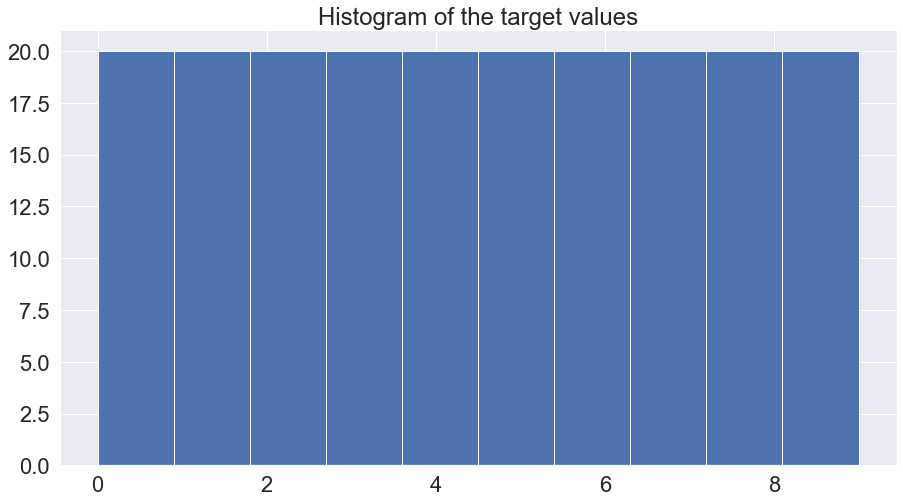

In [80]:
plt.figure(figsize = (15,8))
mydata["Target"].hist()
plt.title("Histogram of the target values")
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [81]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(200, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

#### 7. Développer votre meilleur modèle de classification

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [84]:
import warnings
warnings.filterwarnings('ignore') # Fonction qui permet d'ignorer les warnings

Le GridSearch ci-dessous est réalisé sur différentes model de classifier en utilisant une liste de pipeline. Pour chaque classifier différents paramètres sont testés.

In [85]:
models_names = ["Support Vector Machine", "Decision Tree Classifier", "Random Forest", "Gradient Boosting", "KNN", "XGboost", "MLP"]

pipelines = [Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
        Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('RFC', RandomForestClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('boost', GradientBoostingClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())])]


paramaters = [{'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'svc__C' : [1, 10]},
              {'tree__random_state' : [0, 1, 2, 3, 4]},
              {'RFC__random_state' : [0, 1, 2, 3, 4], 'RFC__n_estimators' : np.arange(100, 125)},
              {'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3]},
              {'KNN__n_neighbors': np.arange(1, 10+1), 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan', 'mikowski'], 'KNN__p' : [2, 3, 4, 5, 6]},
              {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},
              {'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu'], 'MLP__random_state' : [0, 1, 2, 3, 4]}
             ]

In [86]:
Predictions = {}
model = []
i = 0
for p, name, param in zip(pipelines, models_names, paramaters):
    exp = GridSearchCV(p, param_grid = param, cv = 5, scoring = "accuracy")
    exp.fit(X_train, y_train)
    model.append(exp)
    
    print(f"Methode n°{i} - {name}")
    print(f"Score ({name}) : {exp.score(X_test, y_test)*100}% \nMeilleurs paramètres : {exp.best_params_}")
    print("\n ===================================================================== \n")
    i += 1

Methode n°0 - Support Vector Machine
Score (Support Vector Machine) : 87.5% 
Meilleurs paramètres : {'svc__C': 1, 'svc__kernel': 'sigmoid'}


Methode n°1 - Decision Tree Classifier
Score (Decision Tree Classifier) : 62.5% 
Meilleurs paramètres : {'tree__random_state': 3}


Methode n°2 - Random Forest
Score (Random Forest) : 92.5% 
Meilleurs paramètres : {'RFC__n_estimators': 100, 'RFC__random_state': 2}


Methode n°3 - Gradient Boosting
Score (Gradient Boosting) : 77.5% 
Meilleurs paramètres : {'boost__learning_rate': 0.2, 'boost__loss': 'deviance'}


Methode n°4 - KNN
Score (KNN) : 92.5% 
Meilleurs paramètres : {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 2, 'KNN__p': 2, 'KNN__weights': 'uniform'}


Methode n°5 - XGboost
Score (XGboost) : 82.5% 
Meilleurs paramètres : {'XGB__eta': 0.1, 'XGB__eval_metric': 'mlogloss', 'XGB__max_depth': 2}


Methode n°6 - MLP
Score (MLP) : 95.0% 
Meilleurs paramètres : {'MLP__activation': 'logistic', 'MLP__hidden_layer_sizes': (100,), 'MLP__random_s

## Exportation du modelfrom joblib

In [3]:
from joblib import dump, load

In [96]:
# dump(model[6].best_estimator_, 'model.joblib')

scaler = StandardScaler().fit(X_train)
dump(scaler, 'scaler.joblib')

model = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (100,), random_state = 2).fit(scaler.transform(X_train), y_train)
dump(model, 'model.joblib')

['model.joblib']

# Application en Temps Réel

In [7]:
rec()

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 
------------------
Digit :  0.0
------------------
